My Name Is Prajwal Chorghe And My Capstone Project Name Is Retail Data Set. Retail Data Analytics (RDA) Is Used Nowadays From Shops In Order To Better Predict The Amount Of Articles, That Might Get Sold And Therefore To Better Estimate How Much Articles Should Be Produced. This Is Very Important, Because The Amount Of Sold Articles Can Vary Largely During The Year.

## The Objective Of Your Project

The goal of this project is to predict the department wide
weekly sales for a store. This should then help to optimize the
manufacturing process and therefore to increase income while
lowering costs. It should be possible to feed in past sales data
from a department and to get the predicted weekly sales

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import subprocess
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline



We Have Rename The Excel file As It Contains Spaces In File Name
For Example: 
"Feature data set" rename as "Feature_data_Set"
"sales data-set" rename as "Sales_Data_Set"
"stores data-set" rename as "Stores_Data_Set"

# Data Import

In [2]:
features = pd.read_csv("FeatureS_data_Set.csv")
sales = pd.read_csv("Sales_Data_Set.csv")
stores = pd.read_csv("Stores_Data_Set.csv")
print("Sales Total Col.",len(sales.columns),"\nShape:",sales.shape,"\nColumns:",sales.columns.tolist(),"\n=============")
print("Features Total Col.",len(features.columns),"\nShape:", features.shape, "\nColumns:",features.columns.tolist(),"\n=============")
print("Stores Total Col.",len(stores.columns),"\nShape:",stores.shape, "\nColumns:",stores.columns.tolist())

def insight(df):
    print("--------------------")
    print(df.head())
    

insight(sales)
insight(features)
insight(stores)

Sales Total Col. 5 
Shape: (421570, 5) 
Columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'] 
Features Total Col. 12 
Shape: (8190, 12) 
Columns: ['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'] 
Stores Total Col. 3 
Shape: (45, 3) 
Columns: ['Store', 'Type', 'Size']
--------------------
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False
--------------------
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        Na

# Merge All Dataset

In [3]:
final = sales.merge(features,how="left", on=['Store', 'Date', 'IsHoliday'])

In [4]:
final = final.merge(stores, how= "left", on=['Store'])
final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [5]:
print("Final Dataset Col:",len(final.columns),"\nShape: ",final.shape,"\nColumns",final.columns.tolist())

Final Dataset Col: 16 
Shape:  (421570, 16) 
Columns ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size']


In [6]:
info = pd.DataFrame(final.dtypes).T.rename(index = {0:'Column Type'})
info = info.append(pd.DataFrame(final.isnull().sum()).T.rename(index = {0:'null values (nb)'}))
info = info.append(pd.DataFrame(final.isnull().sum()/final.shape[0]*100).T.rename(index = {0:'null values{%}'}))
info


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Column Type,int64,int64,object,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,int64
null values (nb),0,0,0,0,0,0,0,270889,310322,284479,286603,270138,0,0,0,0
null values{%},0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.257181,73.611025,67.480845,67.984676,64.079038,0.0,0.0,0.0,0.0


### Mark Down has Huge amount of missing values so, we can fill the Missing Values using fillna(-9999)

In [7]:
final.fillna(-9999, inplace=True)
info = pd.DataFrame(final.dtypes).T.rename(index = {0:'Column Type'})
info = info.append(pd.DataFrame(final.isnull().sum()).T.rename(index = {0:'null values (nb)'}))
info = info.append(pd.DataFrame(final.isnull().sum()/final.shape[0]*100).T.rename(index = {0:'null values{%}'}))
info

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Column Type,int64,int64,object,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,int64
null values (nb),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
null values{%},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Now, you can check that we have fill all missing values.

Now We are going to check duplicate values and remove them

In [8]:
print("Duplicate Values : ",final.duplicated().sum())

Duplicate Values :  0


In [9]:
final = final.applymap(lambda x: 1 if x ==  True  else x)
final = final.applymap(lambda x: 0 if x ==  False  else x)

In [10]:
final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,0,42.31,2.572,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,1,38.51,2.548,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,0,39.93,2.514,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,0,46.63,2.561,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,0,46.50,2.625,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,211.350143,8.106,A,151315


           Date  Weekly_Sales
112  24/12/2010   80931415.60
107  23/12/2011   76998241.31
117  25/11/2011   66593605.26
122  26/11/2010   65821003.24
79   17/12/2010   61820799.85
74   16/12/2011   60085695.94
46   10/12/2010   55666770.39
41   09/12/2011   55561147.70
25   06/04/2012   53502315.87
27   06/07/2012   51253021.88


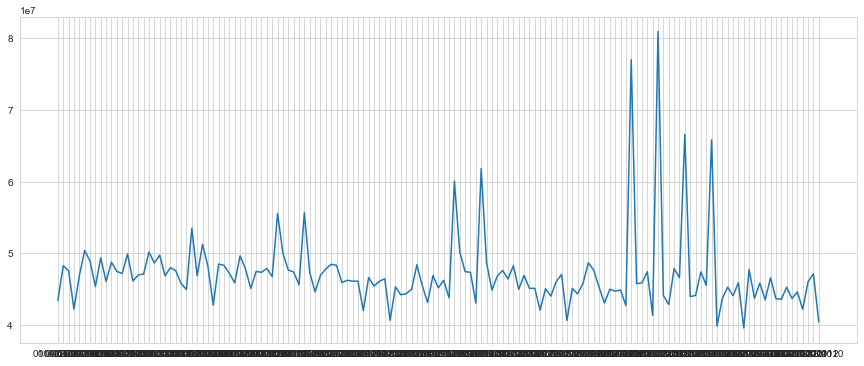

In [11]:
#Average Sales for all store/department for Week

df_average_sales_week = final.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df_average_sales = df_average_sales_week.sort_values('Weekly_Sales', ascending=False)

print(df_average_sales[:10])

#Seasonality vs Trend Analysis
plt.figure(figsize=(15,6))
plt.plot(df_average_sales_week.Date, df_average_sales_week.Weekly_Sales)
plt.show()

#### Once again we checked the Co-relation between weekly Sales and Holiday

   IsHoliday  Weekly_Sales
0          0  6.231919e+09
1          1  5.052996e+08


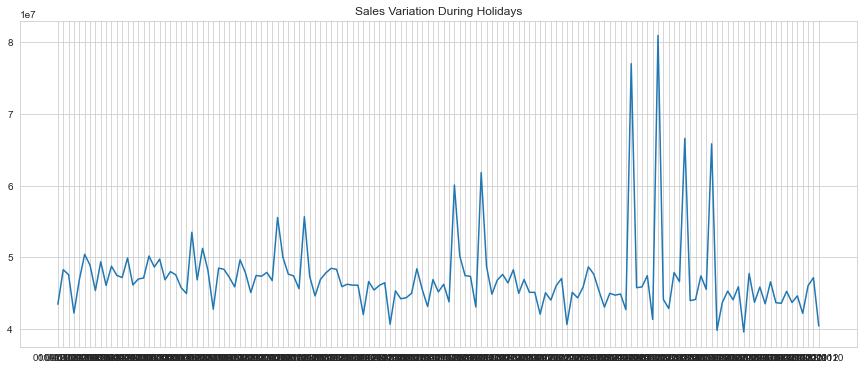

In [12]:
#Sales variation during Holidays(Store/Dept)
holiday =  final[['Date', 'IsHoliday', 'Weekly_Sales']].copy()
holiday =  holiday.groupby(by=['Date','IsHoliday'], as_index=False)['Weekly_Sales'].sum()
holiday_group =  holiday.groupby(by=['IsHoliday'], as_index=False)['Weekly_Sales'].sum()
print( holiday_group)
#print( holiday[:5])

def holiday_sales(df):
    from matplotlib import pyplot as plt
    plt.figure(figsize=(15,6))
    labels = ['Date', 'IsHoliday_x', 'Weekly_Sales']
    plt.title('Sales Variation During Holidays')
    plt.plot(df.Date, df.Weekly_Sales)
    plt.show()
    
holiday_sales(holiday)

In [13]:
final['Return'] = (final['Weekly_Sales'] < 0).astype('int')
final_group = final.groupby(['Return'], as_index = False)['Weekly_Sales'].sum() 
final_group

,Return,Weekly_Sales
0,0,6.737307e+09
1,1,-8.816156e+04


#### For the better prediction I thought to add Weekly average MarkDown across all the MarkDowns

In [14]:
#Making Avg MarkDown
final['AvgMarkDown'] = final['MarkDown1'] + final['MarkDown2'] + final['MarkDown3'] + final['MarkDown4'] + final['MarkDown5']
final['AvgMarkDown'] = final['AvgMarkDown'] / 5
final.AvgMarkDown[378:385]

378     5134.336
379     2559.290
380    11375.348
381     5931.116
382     4573.182
383     1932.570
384     1232.974
Name: AvgMarkDown, dtype: float64

In [15]:
#Creating Weekly sales in a 4 range

final['cum_sum'] = final.Weekly_Sales.cumsum()
final['cum_perc'] = 100*final.cum_sum/final.Weekly_Sales.sum()

final['rangeA'] = 0
final['rangeA'][final['cum_perc'] <= 25] = 1

final['rangeB'] = 0
final['rangeB'][(final['cum_perc'] > 25) & (final['cum_perc'] <= 50)] = 1

final['rangeC'] = 0
final['rangeC'][(final['cum_perc'] > 50) & (final['cum_perc'] <= 75)] = 1

final['rangeD'] = 0
final['rangeD'][final['cum_perc'] > 75] = 1

final = final.drop(['cum_perc', 'cum_sum'], 1)

final.head(100)

C:\Users\Prajwal\AppData\Local\Temp/ipykernel_20404/1143978035.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['rangeA'][final['cum_perc'] <= 25] = 1
C:\Users\Prajwal\AppData\Local\Temp/ipykernel_20404/1143978035.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['rangeB'][(final['cum_perc'] > 25) & (final['cum_perc'] <= 50)] = 1
C:\Users\Prajwal\AppData\Local\Temp/ipykernel_20404/1143978035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,Type,Size,Return,AvgMarkDown,rangeA,rangeB,rangeC,rangeD
0,1,1,05/02/2010,24924.50,0,42.31,2.572,-9999.00,-9999.00,-9999.00,...,211.096358,8.106,A,151315,0,-9999.000,1,0,0,0
1,1,1,12/02/2010,46039.49,1,38.51,2.548,-9999.00,-9999.00,-9999.00,...,211.242170,8.106,A,151315,0,-9999.000,1,0,0,0
2,1,1,19/02/2010,41595.55,0,39.93,2.514,-9999.00,-9999.00,-9999.00,...,211.289143,8.106,A,151315,0,-9999.000,1,0,0,0
3,1,1,26/02/2010,19403.54,0,46.63,2.561,-9999.00,-9999.00,-9999.00,...,211.319643,8.106,A,151315,0,-9999.000,1,0,0,0
4,1,1,05/03/2010,21827.90,0,46.50,2.625,-9999.00,-9999.00,-9999.00,...,211.350143,8.106,A,151315,0,-9999.000,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,02/12/2011,25293.49,0,48.91,3.172,5629.51,68.00,1398.11,...,218.714733,7.866,A,151315,0,5931.116,1,0,0,0
96,1,1,09/12/2011,33305.92,0,43.93,3.158,4640.65,19.00,105.02,...,218.961846,7.866,A,151315,0,4573.182,1,0,0,0
97,1,1,16/12/2011,45773.03,0,51.63,3.159,5011.32,67.00,347.37,...,219.179453,7.866,A,151315,0,1932.570,1,0,0,0
98,1,1,23/12/2011,46788.75,0,47.96,3.112,2725.36,40.48,634.70,...,219.357722,7.866,A,151315,0,1232.974,1,0,0,0


For our exploration analysis we started aggregating the weekly sales with store type because we wanted to know which Store and Type of store was having the most sales, on average

In [16]:
#Aggregate the Top performing stores interms of sales
top_stores = final.groupby(by=['Type'], as_index=False)['Weekly_Sales'].sum()
top_stores

,Type,Weekly_Sales
0,A,4.331015e+09
1,B,2.000701e+09
2,C,4.055035e+08


## Correlation Matrix & Heatmap


Moderate Positive Correlated Features:

Weekly_Sales vs Size: 0.24

Avg MarkDown has highly positive Correlation with MarkDown 1 to MarkDown 5

Moderate Negative Correlated Features:

Unemployment vs CPI : -0.30

In [17]:
clm = final[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size',
                  'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'AvgMarkDown', 'rangeA', 
                  'rangeB', 'rangeC', 'rangeD', 'Return']].copy()
clm.corr()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,AvgMarkDown,rangeA,rangeB,rangeC,rangeD,Return
Weekly_Sales,1.000000,-0.002312,-0.000120,-0.020921,-0.025864,0.243828,0.033450,0.030098,0.041885,0.040800,0.030893,0.041876,0.030899,0.042184,0.011996,-0.078035,-0.039076
Temperature,-0.002312,1.000000,0.143859,0.182112,0.096730,-0.058313,-0.023022,-0.167249,-0.061655,-0.057157,-0.015049,-0.074268,0.146173,-0.122620,-0.093847,0.064937,-0.000408
Fuel_Price,-0.000120,0.143859,1.000000,-0.164210,-0.033853,0.003361,0.427581,0.211915,0.288307,0.380233,0.411167,0.413472,-0.123035,0.055708,0.102799,-0.033664,0.005459
CPI,-0.020921,0.182112,-0.164210,1.000000,-0.299953,-0.003314,0.040587,0.030209,0.035079,0.037474,0.077950,0.052692,0.358054,-0.192377,-0.161769,-0.002916,-0.004713
Unemployment,-0.025864,0.096730,-0.033853,-0.299953,1.000000,-0.068238,-0.176959,-0.129358,-0.137208,-0.183051,-0.201196,-0.197379,-0.266233,0.053173,0.084719,0.117235,0.002055
Size,0.243828,-0.058313,0.003361,-0.003314,-0.068238,1.000000,0.107314,0.109573,0.058181,0.148591,0.079007,0.119014,-0.025250,0.143315,0.102413,-0.202991,-0.006422
MarkDown1,0.033450,-0.023022,0.427581,0.040587,-0.176959,0.107314,1.000000,0.577081,0.538528,0.935263,0.800217,0.926607,-0.003652,0.032053,0.024799,-0.049005,0.000758
MarkDown2,0.030098,-0.167249,0.211915,0.030209,-0.129358,0.109573,0.577081,1.000000,0.411877,0.572866,0.568744,0.741032,0.011335,0.038232,0.019497,-0.063457,0.002262
MarkDown3,0.041885,-0.061655,0.288307,0.035079,-0.137208,0.058181,0.538528,0.411877,1.000000,0.529636,0.580903,0.724293,0.008443,0.018178,0.007212,-0.031056,-0.001268
MarkDown4,0.040800,-0.057157,0.380233,0.037474,-0.183051,0.148591,0.935263,0.572866,0.529636,1.000000,0.762356,0.910057,0.020905,0.047722,0.033903,-0.094365,0.000402


C:\Users\Prajwal\AppData\Local\Temp/ipykernel_20404/1923744176.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels, fontsize=6)
C:\Users\Prajwal\AppData\Local\Temp/ipykernel_20404/1923744176.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels, fontsize=6)


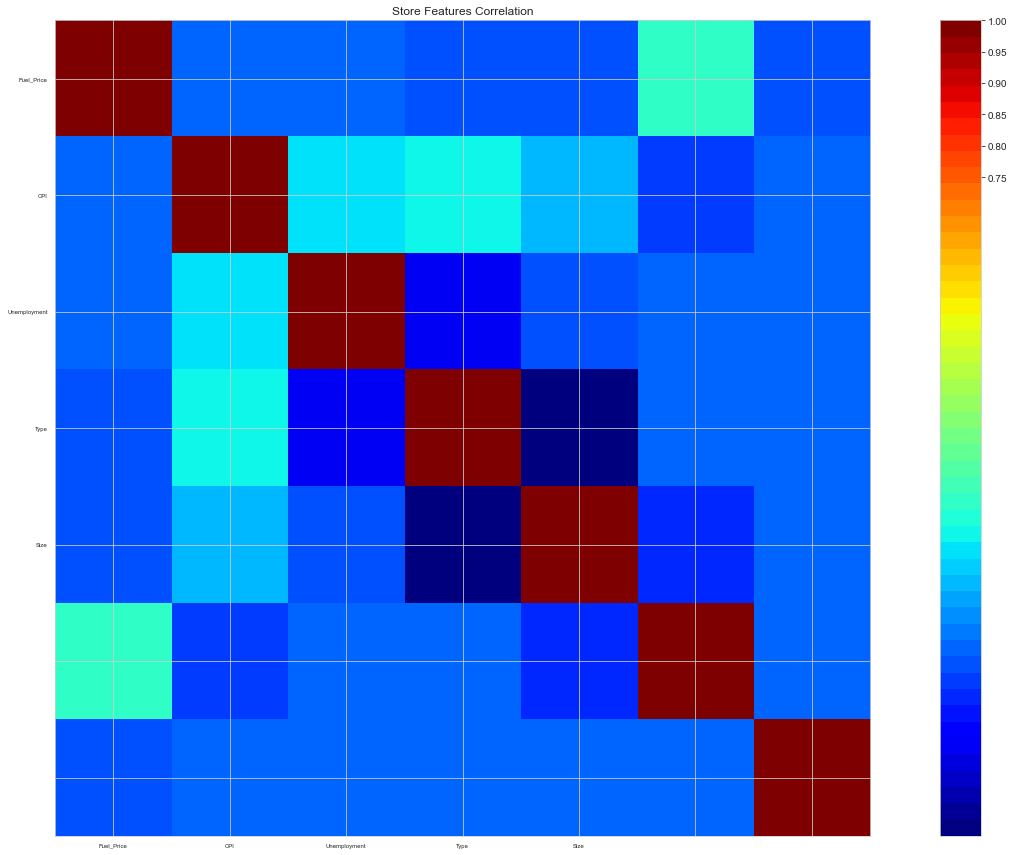

In [18]:
clm = final[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size',
                   'Return']].copy()
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    
    fig = plt.figure(figsize = (25,15))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 50)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Store Features Correlation')
    labels=['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size']
    ax1.set_xticklabels(labels, fontsize=6)
    ax1.set_yticklabels(labels, fontsize=6)
    #Add colorbar to make sure to specify a tick location to match desired tick labels
    fig.colorbar(cax, ticks=[.75, .8, .85, .90, .95, 1])
    plt.show()
    
correlation_matrix(clm)

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt
from matplotlib import style

style.use('ggplot')

#Dropping the 'Label' from  and assigning to X
X = np.array(final.drop(['Weekly_Sales', 'Date', 'Type', 'MarkDown1', 'MarkDown4'], 1))
X = preprocessing.scale(X)


final.dropna(inplace=True)
Y = np.array(final['Weekly_Sales'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

list1 = [X_train, X_test, Y_train, Y_test]
for i in list1:
    print(i.shape)
# Training Model

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)

print(accuracy)

C:\Users\Prajwal\AppData\Local\Temp/ipykernel_20404/3478830143.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(final.drop(['Weekly_Sales', 'Date', 'Type', 'MarkDown1', 'MarkDown4'], 1))


(337256, 17)
(84314, 17)
(337256,)
(84314,)
0.08882190760551678
